# 205229118
# Mahalakshmi S

# LAB-8 Image dataset creation and processing using Neural Networks 

In [2]:
from PIL import Image
import cv2
import glob
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings('ignore')

In [3]:
path1 = glob.glob(r"C:\Users\MAHALAKSHMI\Downloads\PDL LAB\LAB-8\images\trump\*")
path2 = glob.glob(r"C:\Users\MAHALAKSHMI\Downloads\PDL LAB\LAB-8\images\raw chicken\*")
all_path=[]
all_path=path1+path2
all_path

[]

In [4]:
ind = 0
for img in all_path:
    ind = ind+1
    img = Image.open(img)
    img = img.resize((100,100)) 
    re_img = img.crop((20,20,65,70))
    re_img = re_img.resize((500,500))
    re_img = re_img.convert('RGB')
    re_img.save(r"C:\Users\MAHALAKSHMI\Downloads\PDL LAB\LAB-8\pdl_lab-8_images\img_{0}.jpeg".format(ind))
    

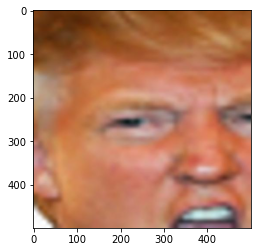

In [ ]:
img = Image.open(r"C:\Users\MAHALAKSHMI\Downloads\PDL LAB\LAB-8\pdl_lab-8_images\img_1.jpeg")

plt.imshow(img)
plt.show()

In [ ]:
erm = []
re_path = glob.glob(r"C:\Users\MAHALAKSHMI\Downloads\PDL LAB\LAB-8\pdl_lab-8_images\*")
for i in re_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    erm.append(img)
len(erm)

20

In [ ]:
labels=[]
for j in range(2):
    for i in range(10):
        labels.append(j)

In [ ]:
labels = np.array(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def concat_vh(list_2d):
    
    return cv2.vconcat([cv2.hconcat(list_h) for list_h in list_2d])                   

# function calling
img_tile = concat_vh([[erm[0],erm[10],erm[1],erm[11]],
                      [erm[2],erm[12],erm[3],erm[13]],
                      [erm[4],erm[14],erm[5],erm[15]],
                      [erm[6],erm[16],erm[7],erm[17]],
                      [erm[8],erm[18],erm[9],erm[19]]])

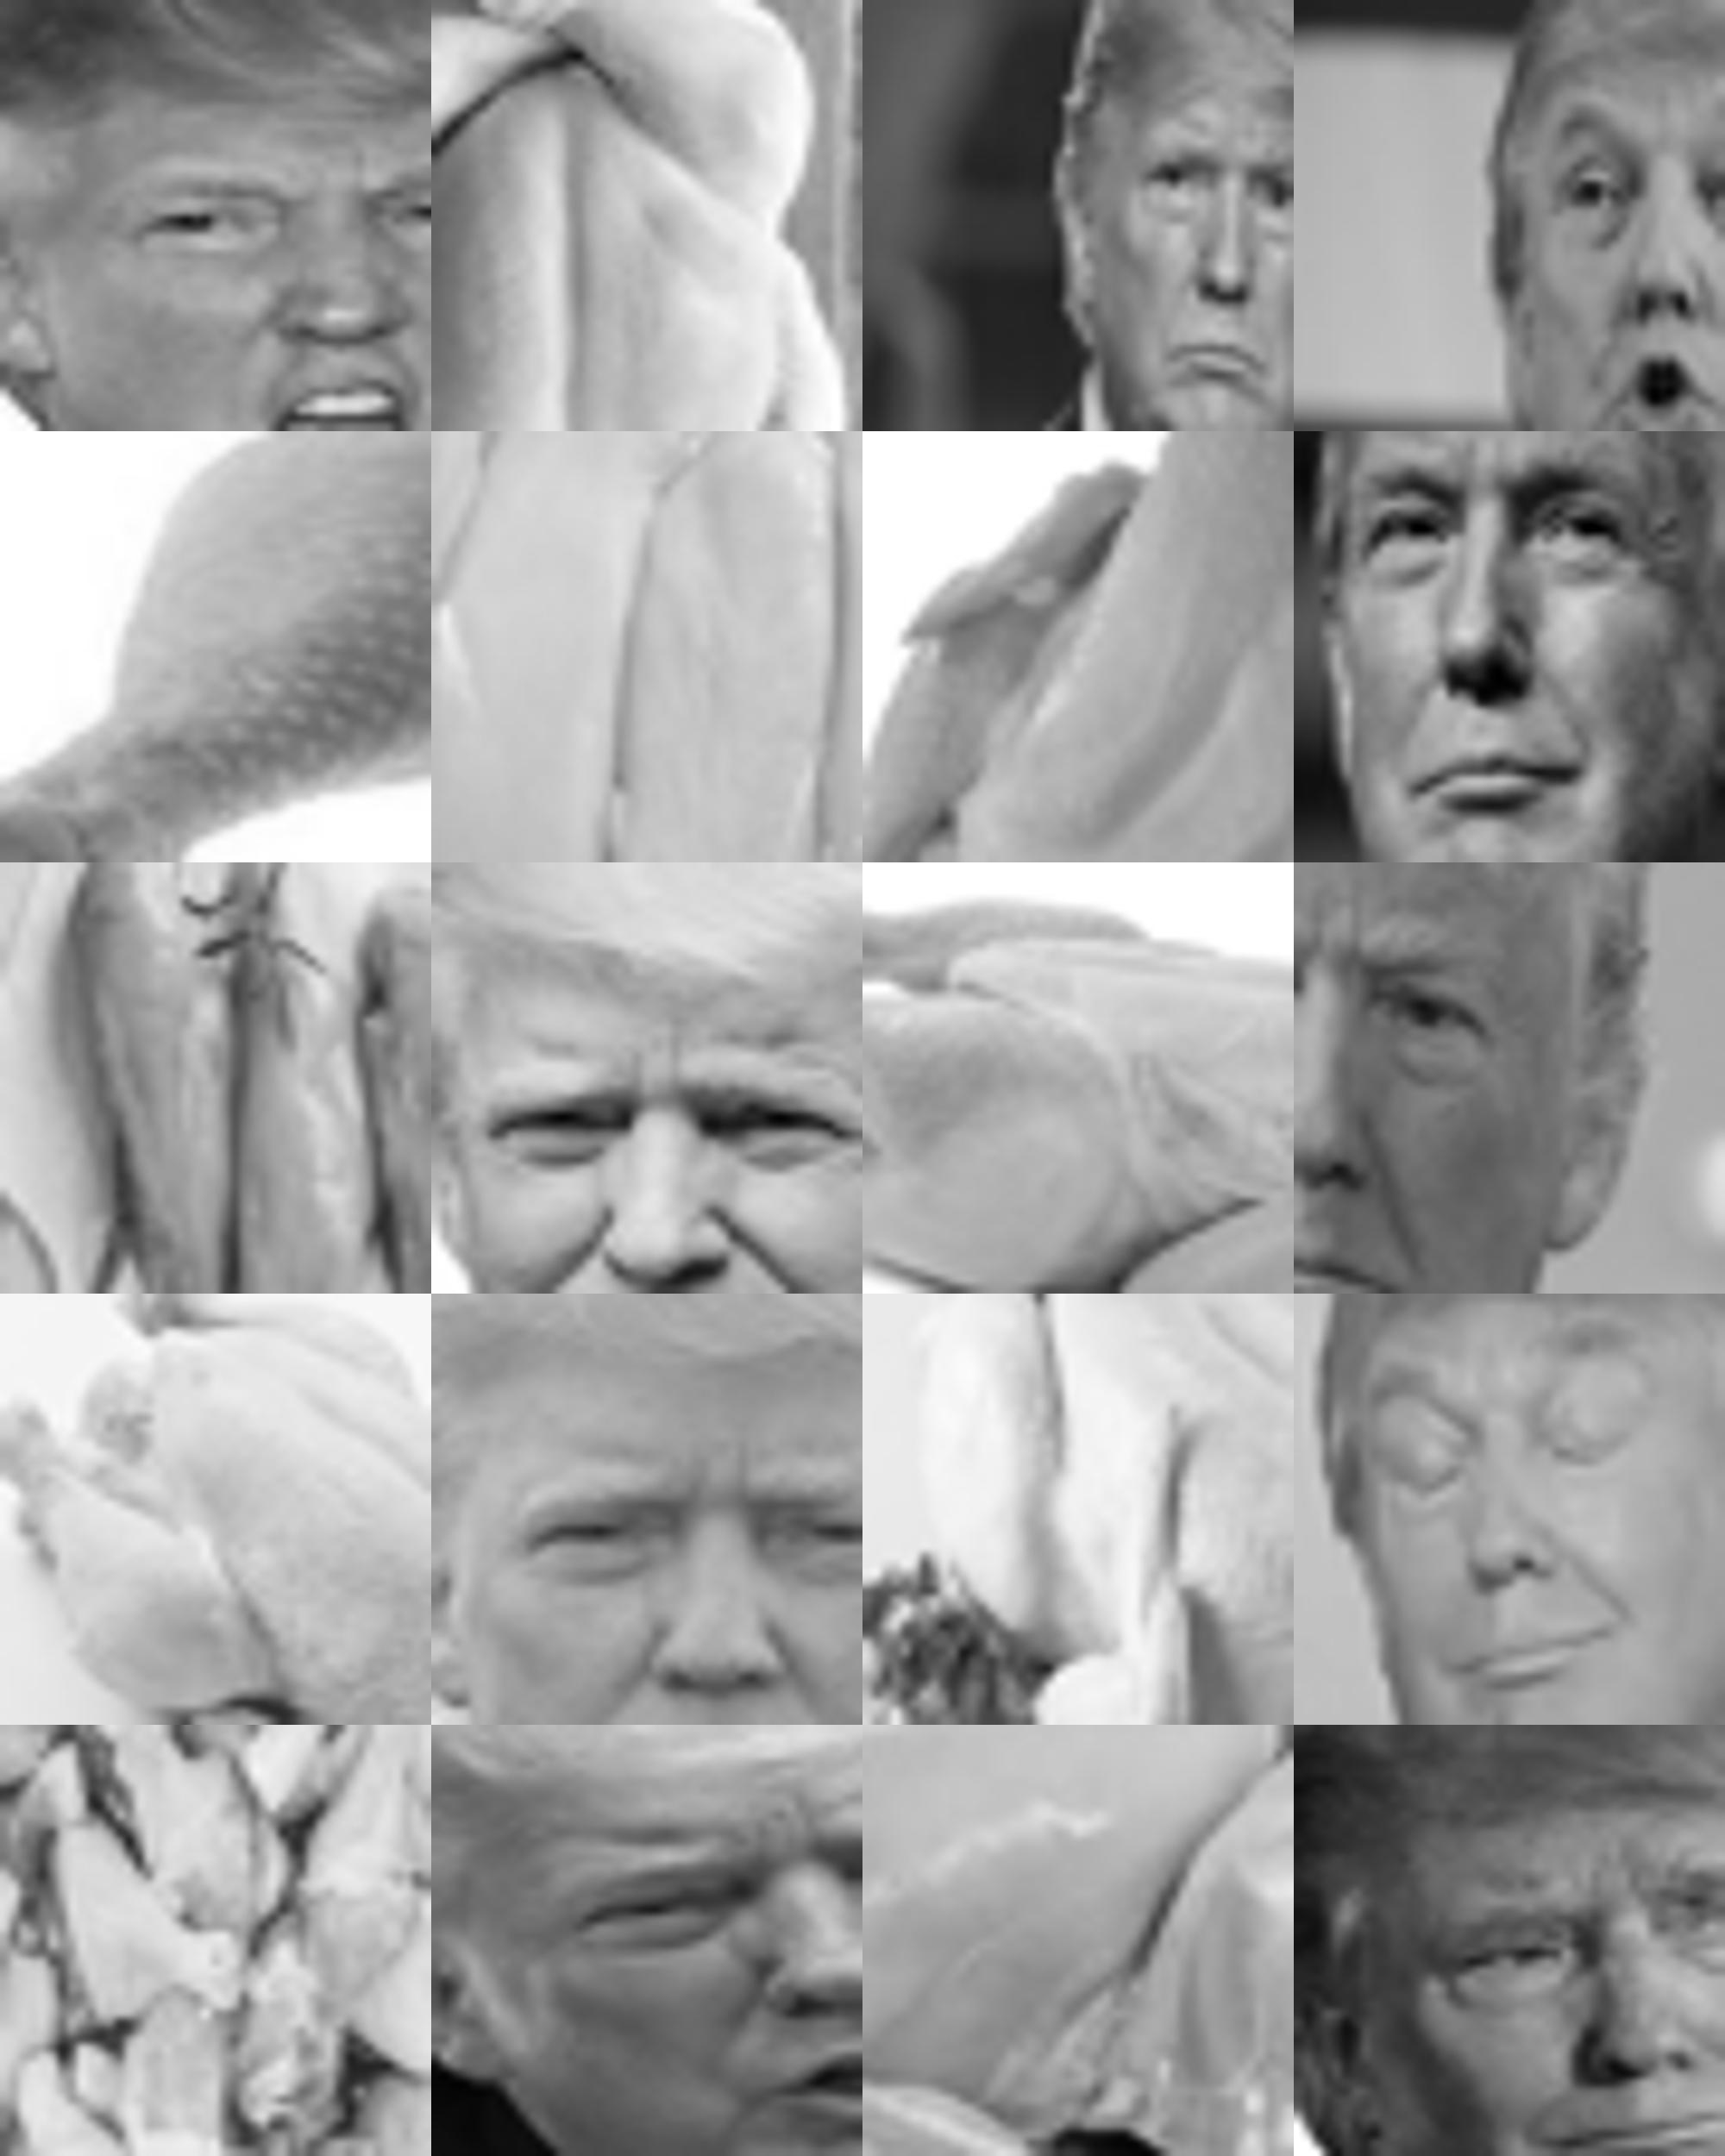

In [ ]:
from PIL import Image
from IPython.display import display, clear_output

# convert color from CV2 BGR back to RGB
img_tile = cv2.cvtColor(img_tile, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_tile))

In [ ]:
img_tile.shape

(2500, 2000, 3)

In [ ]:
erm=np.array(erm)

erm = erm.reshape(erm.shape[0],500,500, 1)

erm.shape

(20, 500, 500, 1)

### 3.Dataset Preparation

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(erm,labels, test_size=0.25, random_state=19)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (15, 500, 500, 1) (15,)
testing shape:  (5, 500, 500, 1) (5,)


### 4.Model Creation

In [ ]:
x_train.shape

(15, 500, 500, 1)

In [ ]:
y_train.shape

(15,)

In [ ]:
import tensorflow as tf

model = Sequential()

model.add(tf.keras.layers.Reshape((500,500,1),input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(500,500,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 500, 500, 1)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 498, 498, 64)      640       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 249, 249, 64)      0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 247, 247, 32)      18464     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 123, 123, 32)      0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 484128)            0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 512)               2

### 5.Analysis

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True,verbose=2)

x_train = x_train / 255

history = model.fit(x_train,y_train,batch_size=32,callbacks=[es_callback],validation_split=0.1, epochs=100,verbose=2)

Epoch 1/100
1/1 - 16s - loss: 0.6968 - accuracy: 0.4615 - val_loss: 71.0677 - val_accuracy: 0.5000
Epoch 2/100
1/1 - 12s - loss: 52.4551 - accuracy: 0.5385 - val_loss: 17.3645 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 15s - loss: 15.0642 - accuracy: 0.4615 - val_loss: 8.9402 - val_accuracy: 0.5000
Epoch 4/100
1/1 - 19s - loss: 7.9734 - accuracy: 0.4615 - val_loss: 8.4077 - val_accuracy: 0.5000
Epoch 5/100
1/1 - 17s - loss: 6.2696 - accuracy: 0.5385 - val_loss: 7.9645 - val_accuracy: 0.5000
Epoch 6/100
1/1 - 15s - loss: 5.4181 - accuracy: 0.5385 - val_loss: 3.3872 - val_accuracy: 0.5000
Epoch 7/100
1/1 - 14s - loss: 1.7870 - accuracy: 0.5385 - val_loss: 0.7688 - val_accuracy: 0.0000e+00
Epoch 8/100
1/1 - 17s - loss: 0.6952 - accuracy: 0.6154 - val_loss: 1.2730 - val_accuracy: 0.5000
Epoch 9/100
1/1 - 11s - loss: 0.9618 - accuracy: 0.4615 - val_loss: 1.0033 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping


In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 2s 2s/step - loss: 13.3549 - accuracy: 0.8000


[13.354936599731445, 0.800000011920929]

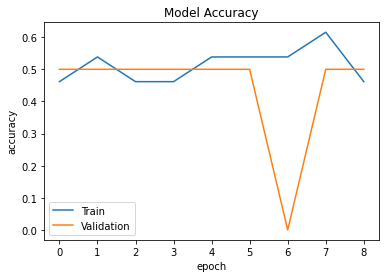

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### For 100 x 100

In [ ]:
erm_100 = []
for i in re_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    erm_100.append(img)

erm_100=np.array(erm_100)
erm_100 = erm_100.reshape(erm_100.shape[0],100,100,1)
erm_100.shape

(20, 100, 100, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(erm_100,labels,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (15, 100, 100, 1) (15,)
testing shape:  (5, 100, 100, 1) (5,)


In [ ]:
model1 = Sequential()

model1.add(tf.keras.layers.Reshape((100,100,1),input_shape=x_train.shape[1:]))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(100,100,1))) 
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(1028, activation='relu'))

model1.add(Dense(2, activation='sigmoid'))

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 100, 100, 1)       0         
_________________________________________________________________
module_wrapper_88 (ModuleWra (None, 98, 98, 64)        640       
_________________________________________________________________
module_wrapper_89 (ModuleWra (None, 49, 49, 64)        0         
_________________________________________________________________
module_wrapper_90 (ModuleWra (None, 47, 47, 32)        18464     
_________________________________________________________________
module_wrapper_91 (ModuleWra (None, 23, 23, 32)        0         
_________________________________________________________________
module_wrapper_92 (ModuleWra (None, 16928)             0         
_________________________________________________________________
module_wrapper_93 (ModuleWra (None, 1028)            

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True,verbose=2)

x_train = x_train / 255

history1 = model1.fit(x_train,y_train,batch_size=32,callbacks=[es_callback],validation_split=0.1, epochs=100,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6931 - accuracy: 0.4615 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 0s - loss: 0.6905 - accuracy: 0.5385 - val_loss: 0.6962 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


In [ ]:
model1.evaluate(x_test,y_test)

1/1 [==============================] - 0s 133ms/step - loss: 9.8700 - accuracy: 0.6000


[9.869987487792969, 0.6000000238418579]

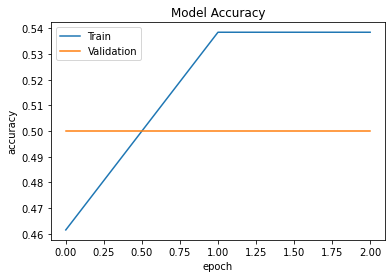

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### For 50 x 50

In [ ]:
erm_50 = []
for i in re_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(50,50))
    erm_50.append(img)

erm_50=np.array(erm_50)
erm_50 = erm_50.reshape(erm_50.shape[0],50,50,1)
erm_50.shape

(20, 50, 50, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(erm_50,labels,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (15, 50, 50, 1) (15,)
testing shape:  (5, 50, 50, 1) (5,)


In [ ]:
model2 = Sequential()

model2.add(tf.keras.layers.Reshape((50,50,1),input_shape=x_train.shape[1:]))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(50,50,1))) 
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(1028, activation='tanh'))
model2.add(Dropout(rate=0.3))
model2.add(Dense(512, activation='tanh'))
model2.add(Dropout(rate=0.3))
model2.add(Dense(256, activation='tanh'))
model2.add(Dense(2, activation='tanh'))

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_25 (Reshape)         (None, 50, 50, 1)         0         
_________________________________________________________________
module_wrapper_220 (ModuleWr (None, 48, 48, 64)        640       
_________________________________________________________________
module_wrapper_221 (ModuleWr (None, 24, 24, 64)        0         
_________________________________________________________________
module_wrapper_222 (ModuleWr (None, 22, 22, 32)        18464     
_________________________________________________________________
module_wrapper_223 (ModuleWr (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_224 (ModuleWr (None, 3872)              0         
_________________________________________________________________
module_wrapper_225 (ModuleWr (None, 1028)            

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True,verbose=2)

x_train = x_train / 255

history2 = model2.fit(x_train,y_train,batch_size=32,callbacks=[es_callback],validation_split=0.1, epochs=100,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6931 - accuracy: 0.3846 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.6931 - accuracy: 0.3077 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 0s - loss: 0.6931 - accuracy: 0.3846 - val_loss: 0.6931 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


In [ ]:
model2.evaluate(x_test,y_test)

1/1 [==============================] - 0s 135ms/step - loss: 5.6624 - accuracy: 0.6000


[5.662444114685059, 0.6000000238418579]

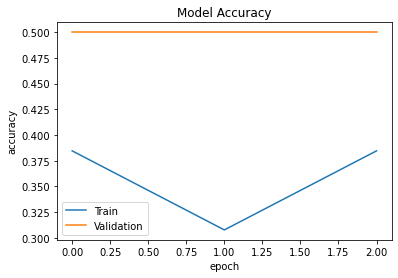

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### For 10x10

In [ ]:
erm_10 = []
for i in re_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(10,10))
    erm_10.append(img)

erm_10=np.array(erm_10)
erm_10 = erm_10.reshape(erm_10.shape[0],10,10,1)
erm_10.shape

(20, 10, 10, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(erm_10,labels,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (15, 10, 10, 1) (15,)
testing shape:  (5, 10, 10, 1) (5,)


In [ ]:
model3 = Sequential()

model3.add(tf.keras.layers.Reshape((10,10,1),input_shape=x_train.shape[1:]))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(10,10,1))) 
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(rate=0.3))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(rate=0.3))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(rate=0.3))

model3.add(Dense(2, activation='sigmoid'))

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 10, 10, 1)         0         
_________________________________________________________________
module_wrapper_243 (ModuleWr (None, 8, 8, 64)          640       
_________________________________________________________________
module_wrapper_244 (ModuleWr (None, 4, 4, 64)          0         
_________________________________________________________________
module_wrapper_245 (ModuleWr (None, 2, 2, 32)          18464     
_________________________________________________________________
module_wrapper_246 (ModuleWr (None, 1, 1, 32)          0         
_________________________________________________________________
module_wrapper_247 (ModuleWr (None, 32)                0         
_________________________________________________________________
module_wrapper_248 (ModuleWr (None, 128)             

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True,verbose=2)

x_train = x_train / 255

history3 = model3.fit(x_train,y_train,batch_size=32,callbacks=[es_callback],validation_split=0.1, epochs=100,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6931 - accuracy: 0.5385 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.6930 - accuracy: 0.3077 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 0s - loss: 0.6925 - accuracy: 0.6923 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
1/1 - 0s - loss: 0.6937 - accuracy: 0.5385 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
1/1 - 0s - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
1/1 - 0s - loss: 0.6925 - accuracy: 0.6154 - val_loss: 0.6932 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [ ]:
model3.evaluate(x_test,y_test)

1/1 [==============================] - 0s 113ms/step - loss: 3.9116 - accuracy: 0.6000


[3.911602020263672, 0.6000000238418579]

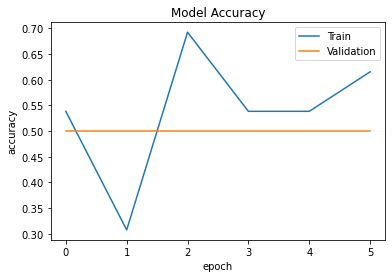

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### 25 x 25

In [ ]:
erm_25 = []
for i in re_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(25,25))
    erm_25.append(img)

erm_25=np.array(erm_25)
erm_25 = erm_25.reshape(erm_25.shape[0],25,25,1)
erm_25.shape

(20, 25, 25, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(erm_25,labels,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (15, 25, 25, 1) (15,)
testing shape:  (5, 25, 25, 1) (5,)


In [ ]:
model4 = Sequential()

model4.add(tf.keras.layers.Reshape((25,25,1),input_shape=x_train.shape[1:]))
model4.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(25,25,1))) 
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))

model4.add(Dense(2, activation='softmax'))

model4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_31 (Reshape)         (None, 25, 25, 1)         0         
_________________________________________________________________
module_wrapper_267 (ModuleWr (None, 23, 23, 64)        640       
_________________________________________________________________
module_wrapper_268 (ModuleWr (None, 11, 11, 64)        0         
_________________________________________________________________
module_wrapper_269 (ModuleWr (None, 9, 9, 32)          18464     
_________________________________________________________________
module_wrapper_270 (ModuleWr (None, 4, 4, 32)          0         
_________________________________________________________________
module_wrapper_271 (ModuleWr (None, 512)               0         
_________________________________________________________________
module_wrapper_272 (ModuleWr (None, 512)             

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True,verbose=2)

x_train = x_train / 255

history4 = model4.fit(x_train,y_train,batch_size=32,callbacks=[es_callback],validation_split=0.1, epochs=100,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6931 - accuracy: 0.4615 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.6926 - accuracy: 0.5385 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 0s - loss: 0.6916 - accuracy: 0.5385 - val_loss: 0.6942 - val_accuracy: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


In [ ]:
model4.evaluate(x_test,y_test)

1/1 [==============================] - 0s 119ms/step - loss: 2.2740 - accuracy: 0.6000


[2.2739858627319336, 0.6000000238418579]

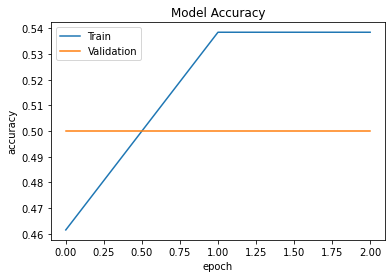

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()